In [ ]:
!pip3 install torch
!pip install torchvision
!pip install torchsummary
!pip install -U numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


In [ ]:
import torch

### tensor
텐서란 매우 수학적인 개념으로 데이터의 배열이라고 볼 수 있습니다.

텐서의 Rank는 간단히 말해서 몇 차원 배열인가를 의미합니다

|RANK|TYPE|EXAMPLE|
|:---:|:---:|:---|
|0|scalar|[1]|
|1|vector|[1,1]|
|2|matrix|[[1,1],[1,1]]|
|3|3-tensor|[[[1,1],[1,1]],[[1,1],[1,1]],[[1,2],[2,1]]]|
|n|n-tensor||

<br>

스칼라는 일반적으로 존재하는 그냥 값(1개)입니다.

벡터는 스칼라가 여러개 모인것이며 차원이 높아질 수록 아래 차원의 것을 모아 놓은 배열인 것이라고 할 수 있습니다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqS1NF%2FbtqubStze09%2F5sbnC8DVd3aQsUULgjv6Kk%2Fimg.png'>



#### 예시 말뭉치

         hi        king         hi        queen       hi          jack
    [[[1,0,0,0], [0,1,0,0]],[[1,0,0,0], [0,0,1,0]],[[1,0,0,0], [0,0,1,0]]]



위의 말뭉치에서 각 word는 4차원으로 구성되어있습니다.

그리고 각 문장은 2개의 단어로 구성되어있습니다.

총 3개의 문장을 가지고 있으므로 위 모델은 **(3,2,4)의 3차원 Tensor**라고 볼 수 있는 것 입니다.






------------

<a href = 'https://rekt77.tistory.com/102'>인공지능 개념] Tensor란 무엇인가?</a>


<br>

### numpy 를 이용한 계산


In [ ]:
import numpy as np

#### scalar

In [ ]:
x = np.array(1)
print(x)
print('x(scalar)의 차원 : ',x.ndim)

1
x(scalar)의 차원 :  0


#### vector

In [ ]:
x = np.array([1,2,3,4,5])
print(x)
print('x(vector)의 차원 : ',x.ndim)

[1 2 3 4 5]
x(vector)의 차원 :  1


#### matrix

vector의 집합


In [ ]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(x)
print('x(matrix)의 차원 : ',x.ndim)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
x(matrix)의 차원 :  2


#### tenxor

matrix의 집합인 tensor는 3차원 부터 시작

In [ ]:
x = np.array([[[1,2,3],[4,5,6],[7,8,9]], [[1,2,3],[4,5,6],[7,8,9]]])
print(x)
print('x(tensor)의 차원 : ',x.ndim)

[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]]
x(tensor)의 차원 :  3


### Pytorch

In [ ]:
# 일반적인 계산

x = 3.5
y = x**2 + 2

print(x, y)

3.5 14.25


In [ ]:
# torch를 이용한 계산

x = torch.tensor(3.5, requires_grad=True) # 자동으로 기울기 계산

print(x)

tensor(3.5000, requires_grad=True)


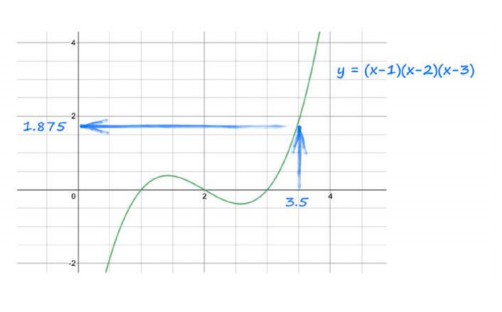


In [ ]:
y = (x-1)*(x-2)*(x-3)

print(y)

tensor(1.8750, grad_fn=<MulBackward0>)


#### 기울기 계산

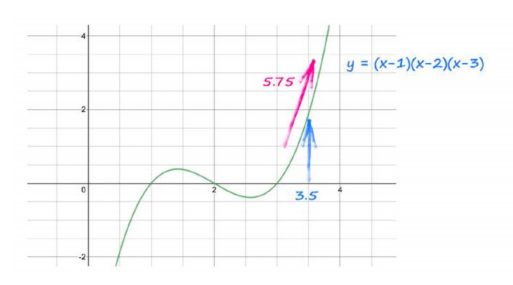

In [ ]:
y.backward()
x.grad

tensor(5.7500)

#### 노드
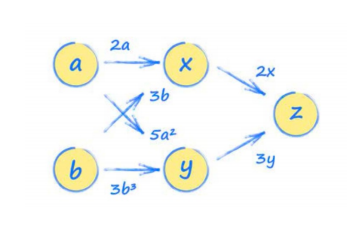



In [ ]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

x = 2*a + 3*b
y = 5*a**2 + 3*b**3
z = 2*x +3*y

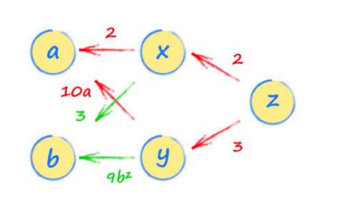

In [ ]:
z.backward() # work out gradients
a.grad # what is gradient at a = 2.0

tensor(64.)

### Boston House Price : 선형 회귀

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data[-5:] # Boston

array([[6.2630e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.5930e+00, 6.9100e+01, 2.4786e+00, 1.0000e+00, 2.7300e+02,
        2.1000e+01, 3.9199e+02, 9.6700e+00],
       [4.5270e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.1200e+00, 7.6700e+01, 2.2875e+00, 1.0000e+00, 2.7300e+02,
        2.1000e+01, 3.9690e+02, 9.0800e+00],
       [6.0760e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.9760e+00, 9.1000e+01, 2.1675e+00, 1.0000e+00, 2.7300e+02,
        2.1000e+01, 3.9690e+02, 5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.7940e+00, 8.9300e+01, 2.3889e+00, 1.0000e+00, 2.7300e+02,
        2.1000e+01, 3.9345e+02, 6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01,
        6.0300e+00, 8.0800e+01, 2.5050e+00, 1.0000e+00, 2.7300e+02,
        2.1000e+01, 3.9690e+02, 7.8800e+00]])

In [ ]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ]
df = pd.DataFrame(data, columns = cols)
df['TARGET'] = target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
features = ['TARGET', 'INDUS', 'RM', 'LSTAT',  'NOX', 'DIS' ]
data = torch.from_numpy(df[features].values).float()
print(data.shape)
data



torch.Size([506, 6])


tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

#### 하이퍼파라미터

In [ ]:
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

#### 모델 수립

In [ ]:
x = data[:, 1:]
y = data[:, :1]

In [ ]:
model = nn.Linear(x.size(-1), y.size(-1))
model

Linear(in_features=5, out_features=1, bias=True)

#### Optimizer

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#### 학습 시작

optimizer.zero_grad()

이전 반복에서 계산한 기울기를 초기화합니다. PyTorch의 옵티마이저(optimizer)는 역전파 단계에서 계산된 기울기를 사용하여 가중치를 업데이트하는데, 이전 반복에서 계산된 기울기를 남겨두면 그래디언트가 축적되어 잘못된 결과를 가져올 수 있습니다. 따라서 각 반복마다 기울기를 초기화하는 단계가 필요합니다.

loss.backward()

손실값을 역전파하여 각 모델 파라미터에 대한 기울기를 계산합니다. 역전파 단계에서는 손실값을 모델의 파라미터로 미분하여 기울기를 계산하는데, 이를 통해 모델을 학습할 수 있습니다.

optimizer.step()

옵티마이저를 사용하여 모델의 파라미터를 업데이트합니다. 이전 단계에서 계산된 기울기를 사용하여 가중치를 업데이트하고, 모델을 학습하는데 필요한 최적화 알고리즘을 수행합니다.

In [ ]:
for i in range(n_epochs):
  y_hat = model(x)
  loss = F.mse_loss(y_hat, y)

  optimizer.zero_grad() # 이전 반복에서 계산한 기울기를 초기화
  loss.backward()

  optimizer.step()

  if(i + 1) % print_interval == 0:
    print('Epoch %d: loss=%.4e' % (i+1, loss))

Epoch 100: loss=4.5335e+01
Epoch 200: loss=3.8085e+01
Epoch 300: loss=3.4106e+01
Epoch 400: loss=3.1863e+01
Epoch 500: loss=3.0599e+01
Epoch 600: loss=2.9886e+01
Epoch 700: loss=2.9484e+01
Epoch 800: loss=2.9258e+01
Epoch 900: loss=2.9129e+01
Epoch 1000: loss=2.9057e+01
Epoch 1100: loss=2.9016e+01
Epoch 1200: loss=2.8992e+01
Epoch 1300: loss=2.8979e+01
Epoch 1400: loss=2.8971e+01
Epoch 1500: loss=2.8966e+01
Epoch 1600: loss=2.8963e+01
Epoch 1700: loss=2.8961e+01
Epoch 1800: loss=2.8960e+01
Epoch 1900: loss=2.8959e+01
Epoch 2000: loss=2.8958e+01


#### 학습 결과

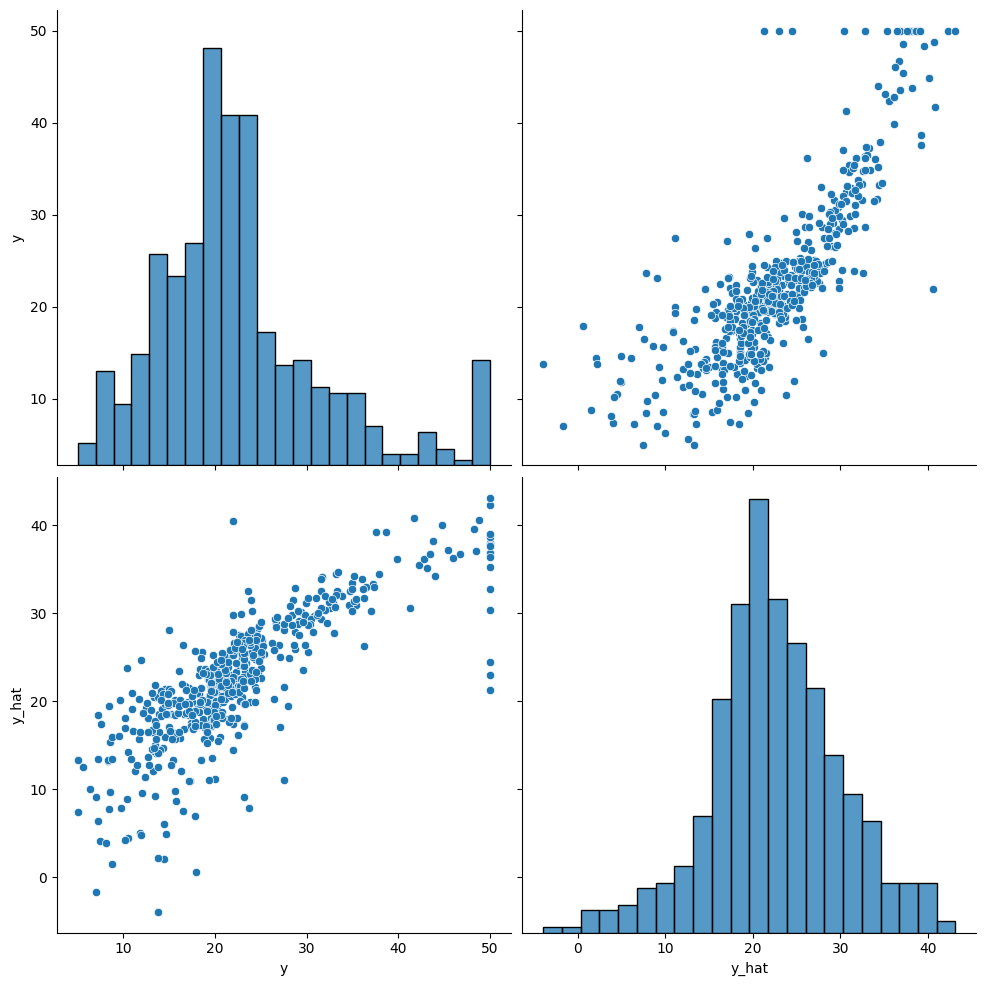

In [ ]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(),
                  columns=['y','y_hat'])

sns.pairplot(df, height=5)
plt.show()

### Breast Cancer

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


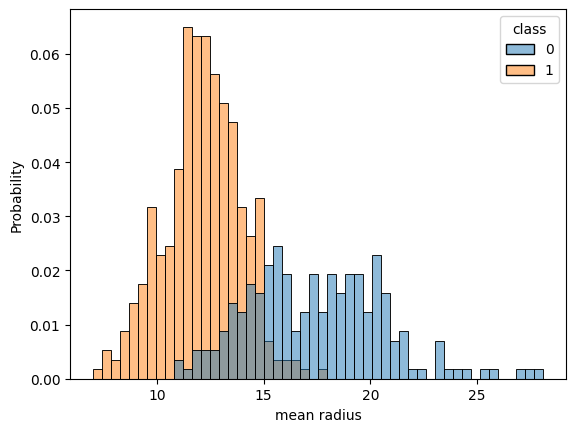

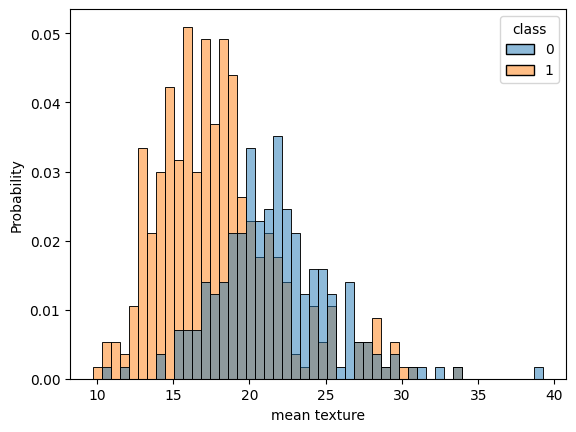

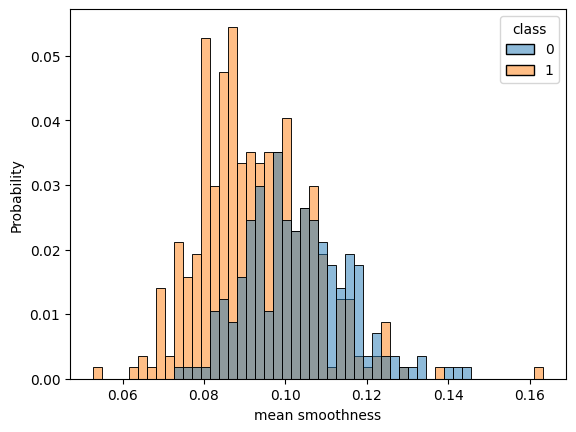

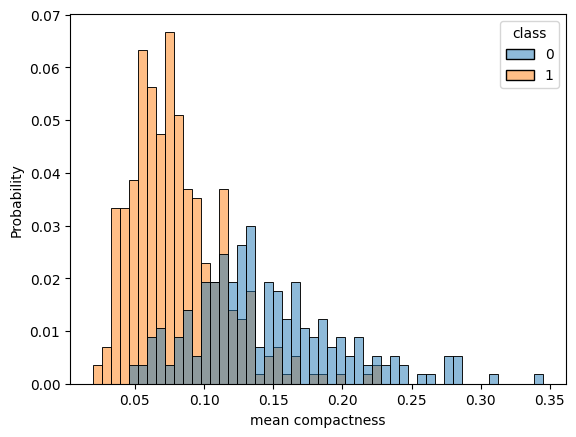

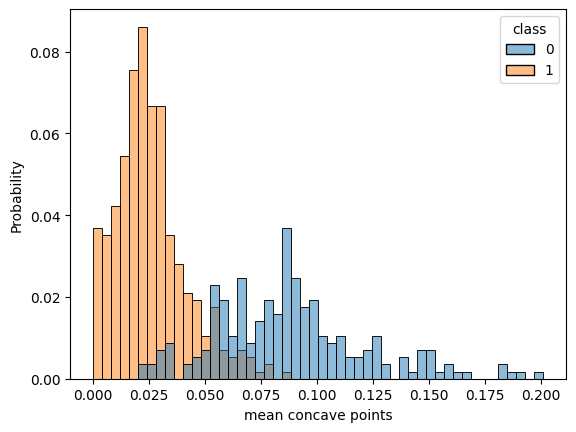

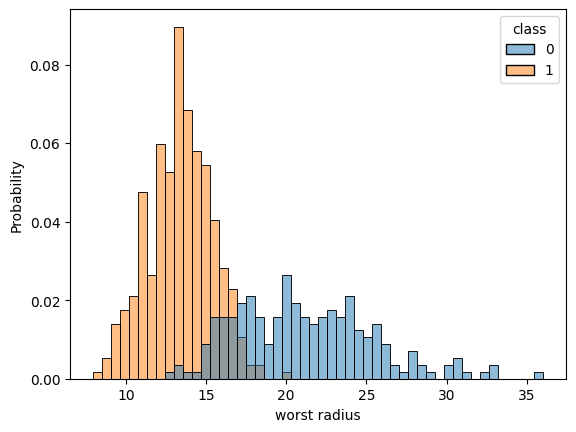

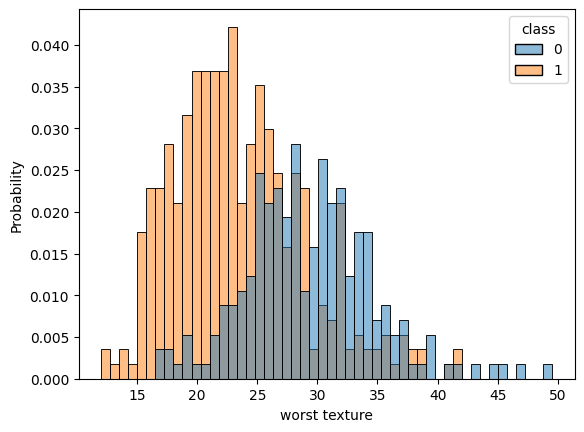

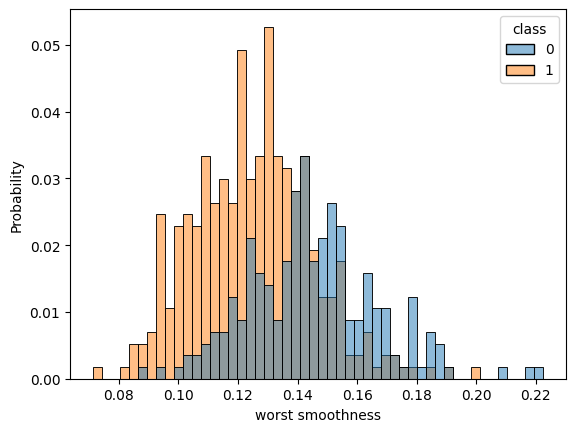

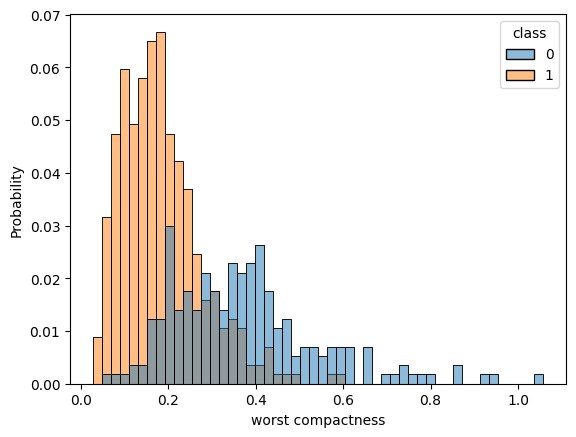

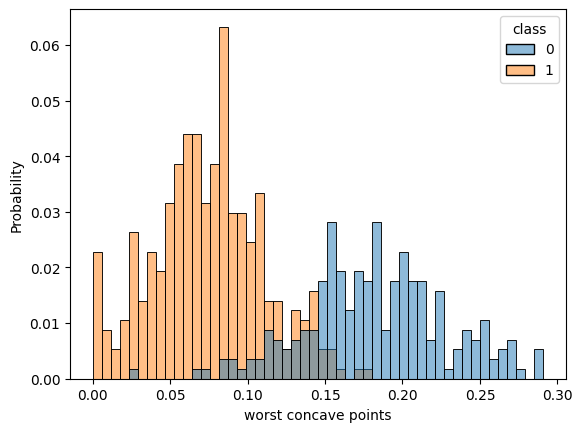

In [ ]:
cols = ['mean radius', 'mean texture',
        'mean smoothness', 'mean compactness', 'mean concave points',
        'worst radius', 'worst texture',
         'worst smoothness', 'worst compactness', 'worst concave points',
         'class']

for c in cols[:-1]:
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat="probability")
    plt.show()

#### 데이터 나누기

In [ ]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([569, 11])

In [ ]:
x = data[:, :-1]
y = data[:, -1:]


#### 하이퍼파라미터

In [ ]:
n_epochs = 300000
learning_rate = 2e-5
print_interval = 10000

#### MyModel 클래스 생성


- super().__init__()

nn.Module 클래스의 생성자를 호출하여 초기화합니다.

- self.linear = nn.Linear(input_dim, output_dim)

nn.Linear 모듈을 사용하여 입력 차원에서 출력 차원으로의 선형 변환을 수행하는 선형 레이어를 생성합니다. 이 레이어는 모델의 학습 가능한 매개변수를 가집니다.
- self.act = nn.Sigmoid()

nn.Sigmoid()를 사용하여 시그모이드 활성화 함수를 정의합니다. 이 함수는 선형 변환의 출력을 0과 1 사이로 압축하는 역할을 합니다.

- y = self.act(self.linear(x))

입력 데이터 x를 선형 레이어를 통과시키고, 그 결과에 시그모이드 활성화 함수를 적용하여 출력 y를 계산합니다.

In [ ]:
class MyModel(nn.Module):

  def __init__(self, input_dim, output_dim):
    self.input_dim = input_dim
    self.output_dim = output_dim

    super().__init__()

    self.linear = nn.Linear(input_dim, output_dim)
    self.act = nn.Sigmoid()


  def forward(self, x):
    y = self.act(self.linear(x))

    return y


#### 모듈 선언, loss, optim 선언

In [ ]:
model = MyModel(input_dim = x.size(-1), output_dim = y.size(-1))

crit = nn.BCELoss() # Define BCELoss instead of MSELoss

optimzer = optim.SGD(model.parameters(),
                     lr = learning_rate)

#### 모델 학습

In [ ]:
for i in range(n_epochs):
  y_hat = model(x)
  loss = crit(y_hat, y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1)%print_interval == 0:
    print('Epochs %d: loss=%.4e'%(i+1, loss))

Epochs 10000: loss=8.5389e-01
Epochs 20000: loss=8.5389e-01
Epochs 30000: loss=8.5389e-01
Epochs 40000: loss=8.5389e-01
Epochs 50000: loss=8.5389e-01
Epochs 60000: loss=8.5389e-01
Epochs 70000: loss=8.5389e-01
Epochs 80000: loss=8.5389e-01
Epochs 90000: loss=8.5389e-01
Epochs 100000: loss=8.5389e-01
Epochs 110000: loss=8.5389e-01
Epochs 120000: loss=8.5389e-01
Epochs 130000: loss=8.5389e-01
Epochs 140000: loss=8.5389e-01
Epochs 150000: loss=8.5389e-01
Epochs 160000: loss=8.5389e-01
Epochs 170000: loss=8.5389e-01
Epochs 180000: loss=8.5389e-01
Epochs 190000: loss=8.5389e-01
Epochs 200000: loss=8.5389e-01
Epochs 210000: loss=8.5389e-01
Epochs 220000: loss=8.5389e-01
Epochs 230000: loss=8.5389e-01
Epochs 240000: loss=8.5389e-01
Epochs 250000: loss=8.5389e-01
Epochs 260000: loss=8.5389e-01
Epochs 270000: loss=8.5389e-01
Epochs 280000: loss=8.5389e-01
Epochs 290000: loss=8.5389e-01
Epochs 300000: loss=8.5389e-01


#### 정확도 계산

In [ ]:
correct_cnt = (y == (y_hat>.5)).sum()
total_cnt = float(y.size(0))

print('Accuracy: %.4f'%(correct_cnt/total_cnt))

Accuracy: 0.6327


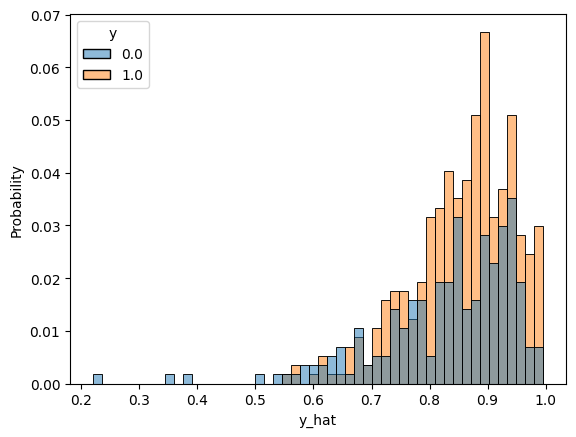

In [ ]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=['y', 'y_hat'])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()

### MNIST

In [108]:
from torchvision import datasets, transforms

In [109]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')
print('Current cuda device is ', device)

Current cuda device is  cuda


#### 파라미터 설정

In [110]:
batch_size = 50
learning_rate = 1e-4
epoch_num = 15

#### MNIST 데이터 불러오기

In [111]:
train_data = datasets.MNIST(root=',/data',
                            train=True,
                            download=True,
                            transform = transforms.ToTensor())

test_data = datasets.MNIST(root=',/data',
                            train=False,
                            transform = transforms.ToTensor())

print("number of training data : ",len(train_data))
print("number of test data : ",len(test_data))


number of training data :  60000
number of test data :  10000


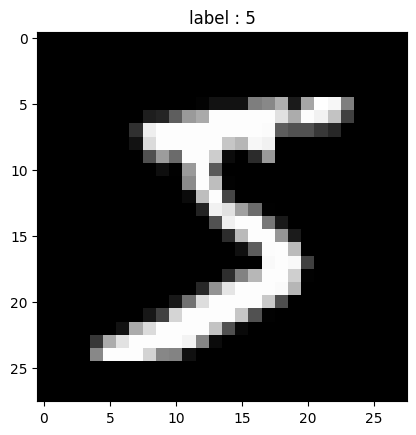

In [112]:
image, label = train_data[0]

plt.imshow(image.squeeze().numpy(), cmap = 'gray')
plt.title('label : %s'%label)
plt.show()

#### 미니배치 구성

In [113]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                          batch_size = batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                          batch_size = batch_size,
                                          shuffle=True)

first_batch = train_loader.__iter__().__next__()

In [114]:

print("{:15s} | {:<25s} | {}".format("name", "type", "size"))
print("{:15s} | {:<25s} | {}".format("Num of Batch", "", len(train_loader)))
print("{:15s} | {:<25s} | {}".format("first_batch", str(type(first_batch)), len(first_batch)))
print("{:15s} | {:<25s} | {}".format("first_batch[0]", str(type(first_batch[0])), first_batch[0].shape))
print("{:15s} | {:<25s} | {}".format("first_batch[1]", str(type(first_batch[1])), first_batch[1].shape))


name            | type                      | size
Num of Batch    |                           | 1200
first_batch     | <class 'list'>            | 2
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


#### CNN 모델 생성

<img src = 'https://miro.medium.com/v2/resize:fit:3744/format:webp/1*SGPGG7oeSvVlV5sOSQ2iZw.png'>

###### Image by <a href = 'https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9'>MNIST Handwritten Digits Classification using a Convolutional Neural Network (CNN)</a>

In [115]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, padding="same")
        self.conv2 = nn.Conv2d(32, 64, 3, 1, padding="same")
        self.dropout = nn.Dropout2d(0.25)

        self.fc1 = nn.Linear(3136, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)

        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)

        x = self.dropout(x)
        x = torch.flatten(x,1)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)

        return output
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [116]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

#### 모델 학습

In [117]:
from time import time

model.train()
i = 1
for epoch in range(epoch_num):
    start_time_each_epoch = time()
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if i%1000==0:
            print("Time: %.3f\tTrain Step: %d\tLoss: %.3f\t" %(time() - start_time_each_epoch, i, loss.item()))
        i+=1

Time: 8.872	Train Step: 1000	Loss: 0.071	
Time: 7.224	Train Step: 2000	Loss: 0.056	
Time: 5.710	Train Step: 3000	Loss: 0.079	
Time: 9.072	Train Step: 4000	Loss: 0.027	
Time: 1.712	Train Step: 5000	Loss: 0.064	
Time: 13.672	Train Step: 6000	Loss: 0.006	
Time: 9.095	Train Step: 7000	Loss: 0.060	
Time: 8.647	Train Step: 8000	Loss: 0.088	
Time: 5.177	Train Step: 9000	Loss: 0.098	
Time: 3.435	Train Step: 10000	Loss: 0.006	
Time: 1.711	Train Step: 11000	Loss: 0.015	
Time: 10.599	Train Step: 12000	Loss: 0.007	
Time: 8.931	Train Step: 13000	Loss: 0.053	
Time: 7.537	Train Step: 14000	Loss: 0.038	
Time: 5.719	Train Step: 15000	Loss: 0.025	
Time: 5.286	Train Step: 16000	Loss: 0.005	
Time: 1.724	Train Step: 17000	Loss: 0.003	
Time: 10.932	Train Step: 18000	Loss: 0.000	


#### 모델 평가

In [118]:
model.eval()
correct = 0

for data, target in test_loader:
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    prediction = output.data.max(1)[1]
    correct += prediction.eq(target.data).sum()

print("Test set: Accuracy: %.2f" %(100.*correct / len(test_loader.dataset)))

Test set: Accuracy: 99.16
